In [218]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [219]:
pip install matplotlib

In [220]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [221]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [222]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [223]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [226]:
data = pd.read_csv(r"C:\Users\hp\Downloads\sample_data\hotel_bookings.csv") 

### Basic structure of Dataset ###

In [227]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Summary of columns, non-null counts, and data types ###

In [228]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   

### First raw of Dataset ###

In [229]:
print("\nFirst Few Rows of the Dataset:")
print(data.head())


First Few Rows of the Dataset:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0     

### Missing Values and Data Cleaning ###

#Check for missing values in each column#

In [230]:
print("\nMissing Values per Column:")
print(data.isnull().sum())


Missing Values per Column:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                        

# Filling 'agent' and 'company' columns with 0#

In [231]:

Missing Values per Column:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
...
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
dtype: int64
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

# Replace NaNs in 'children' with 0 assuming missing values mean no children #

In [232]:
data.fillna({'children': 0}, inplace=True)

# For 'country', fill NaN with 'Unknown' #

In [233]:
data.fillna({'country': 'Unknown'}, inplace=True)

In [234]:
### Converting Data Type ###

#  Convert 'reservation_status_date' to datetime #

In [235]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

# Convert 'is_canceled' and 'is_repeated_guest' to categorical types #

In [236]:
data['is_canceled'] = data['is_canceled'].astype('category')
data['is_repeated_guest'] = data['is_repeated_guest'].astype('category')

# Convert 'agent' and 'company' columns to integers after filling NaNs #

In [237]:
data['agent'] = data['agent'].astype(int)
data['company'] = data['company'].astype(int)

# Convert other categorical columns to 'category' data type for optimized memory usage #

In [238]:
categorical_columns = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 
                       'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 
                       'reservation_status']
for col in categorical_columns:
    data[col] = data[col].astype('category')

### Feature engineering ###

# Create 'total_nights' feature# 

In [239]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

# Create 'total_guests' feature

In [240]:
data['total_guests'] = data['adults'] + data['children'] + data['babies']

# Create 'lead_time_weeks' feature #

In [241]:
data['lead_time_weeks'] = data['lead_time'] / 7

# Create 'is_high_season' feature (assuming July and August as high season months) #

In [242]:
high_season_months = ['July', 'August']
data['is_high_season'] = data['arrival_date_month'].isin(high_season_months).astype(int)

# Display the dataset with new features #

In [243]:
print("\nDataset with New Features:")
print(data.head())


Dataset with New Features:
          hotel is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel           0        342               2015               July   
1  Resort Hotel           0        737               2015               July   
2  Resort Hotel           0          7               2015               July   
3  Resort Hotel           0         13               2015               July   
4  Resort Hotel           0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ... 

### Seasonality in Bookings ###

# Booking by Months #

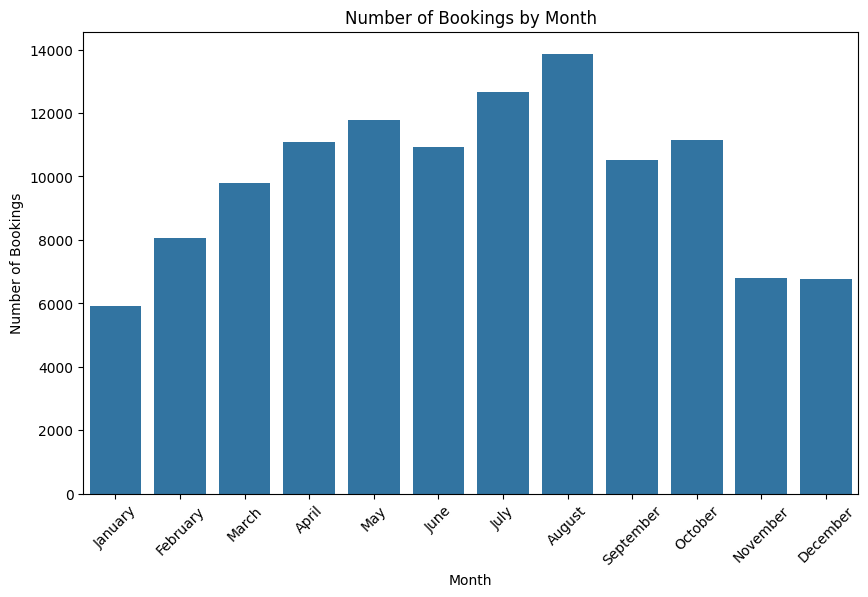

In [244]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='arrival_date_month', order=[
              'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title("Number of Bookings by Month")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()

# Booking by Years #

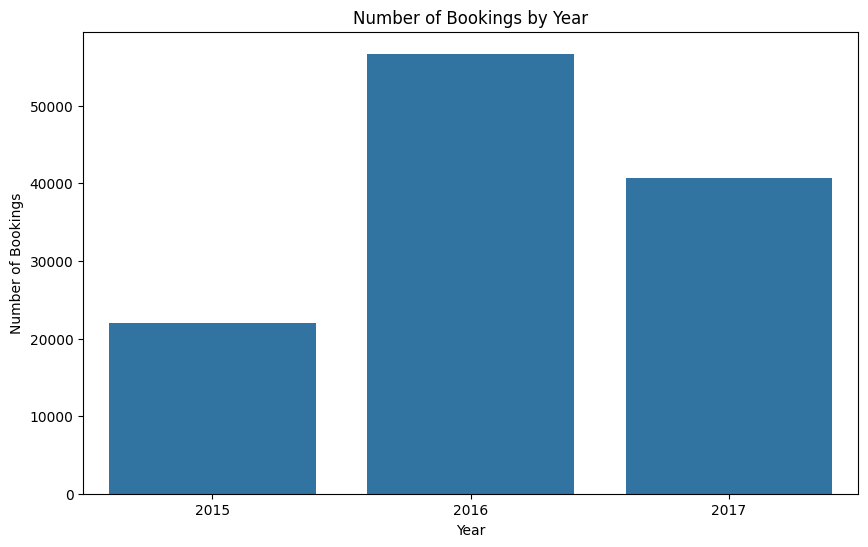

In [245]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='arrival_date_year')
plt.title("Number of Bookings by Year")
plt.xlabel("Year")
plt.ylabel("Number of Bookings")
plt.show()

### Distribution of Stays Across Different Hotel Types ###

# Distribution of bookings by hotel type

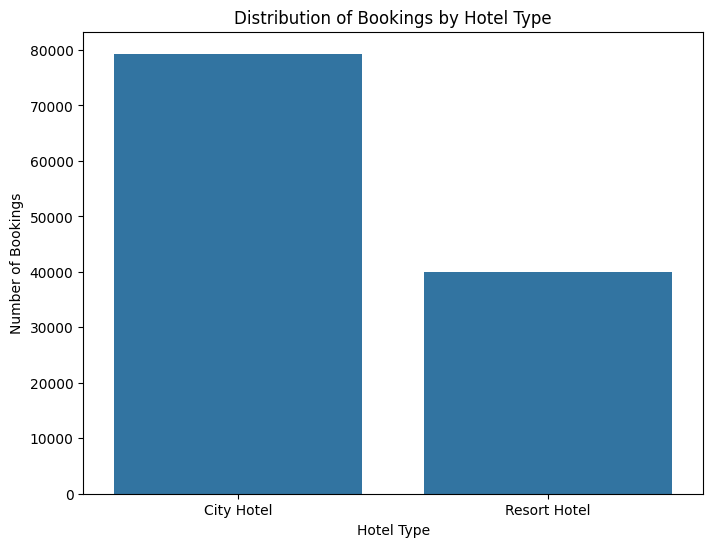

In [246]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='hotel')
plt.title("Distribution of Bookings by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Number of Bookings")
plt.show()


# ADR by hotel type #

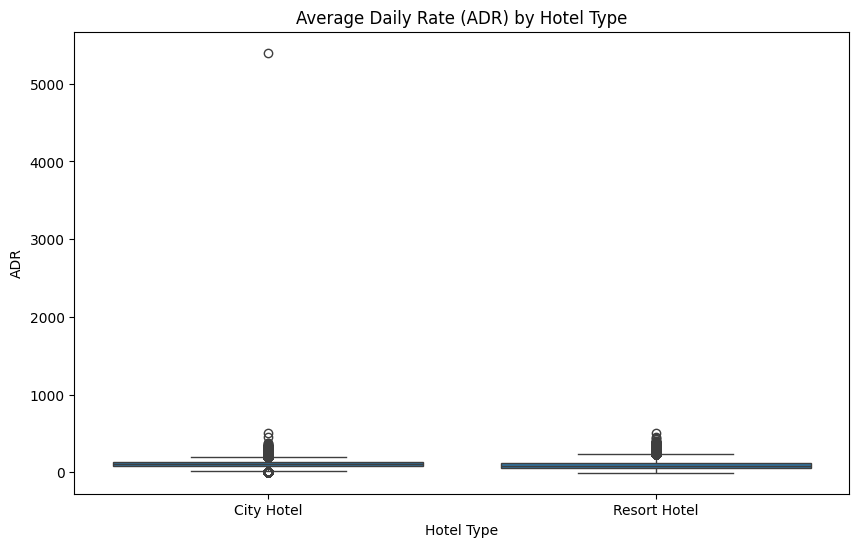

In [247]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='hotel', y='adr')
plt.title("Average Daily Rate (ADR) by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("ADR")
plt.show()

### Average Daily Rate (ADR) Trends time in month ###

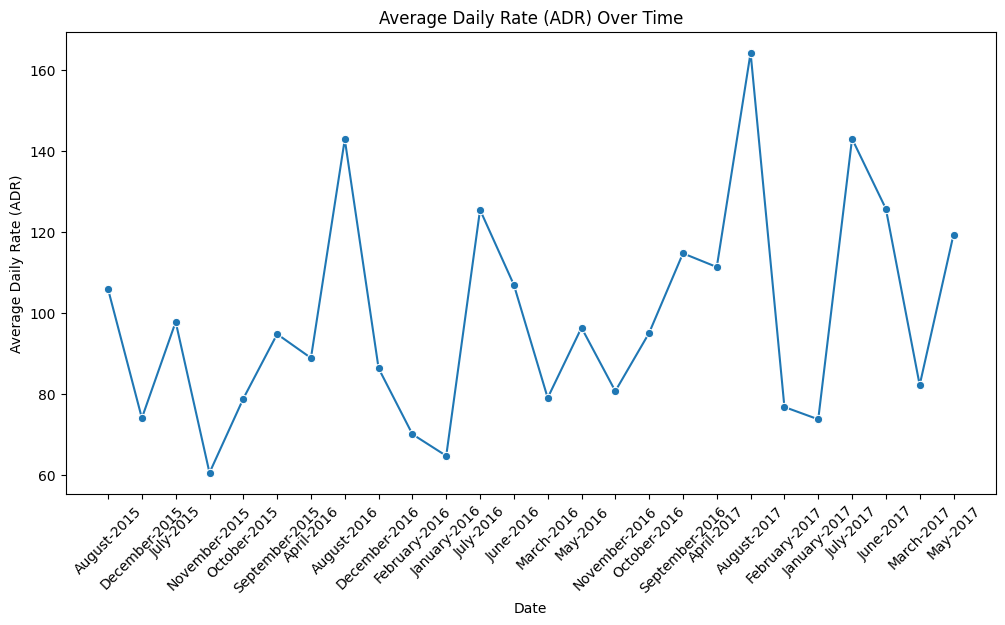

In [248]:
monthly_adr = data.groupby(['arrival_date_year', 'arrival_date_month'])['adr'].mean().reset_index()
monthly_adr['date'] = monthly_adr['arrival_date_month'] + "-" + monthly_adr['arrival_date_year'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_adr, x='date', y='adr', marker="o")
plt.xticks(rotation=45)
plt.title("Average Daily Rate (ADR) Over Time")
plt.xlabel("Date")
plt.ylabel("Average Daily Rate (ADR)")
plt.show()

### Cancellation Rates and Factors Affecting Cancellations ###

# Cancellation rate by hotel type #

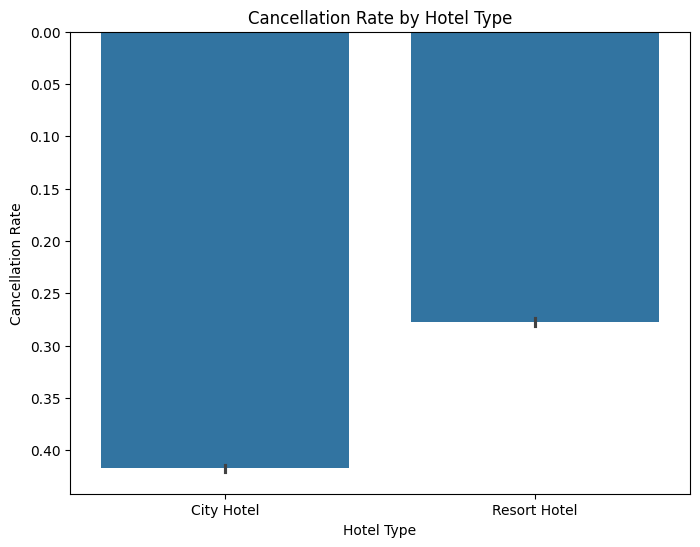

In [249]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='hotel', y='is_canceled')
plt.title("Cancellation Rate by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Cancellation Rate")
plt.show()

# Cancellations by lead time #

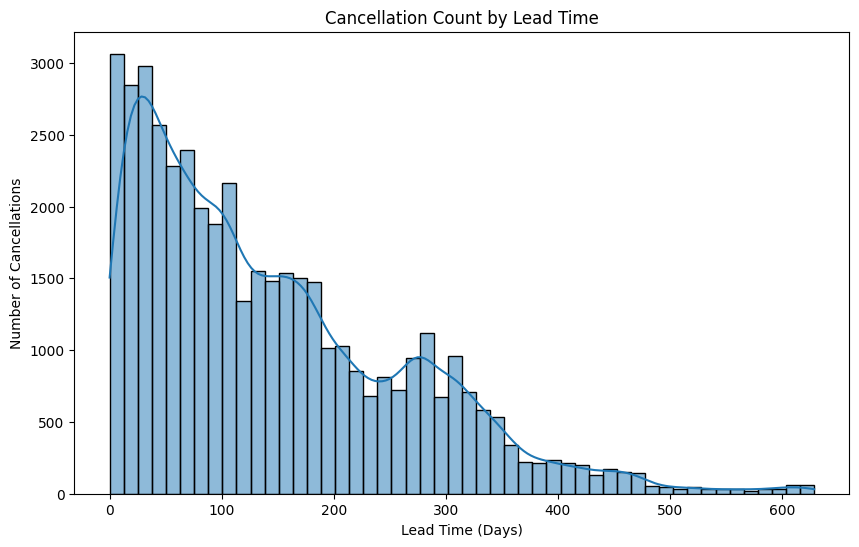

In [250]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['is_canceled'] == 1], x='lead_time', bins=50, kde=True)
plt.title("Cancellation Count by Lead Time")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Number of Cancellations")
plt.show()

# Cancellations by deposit type #

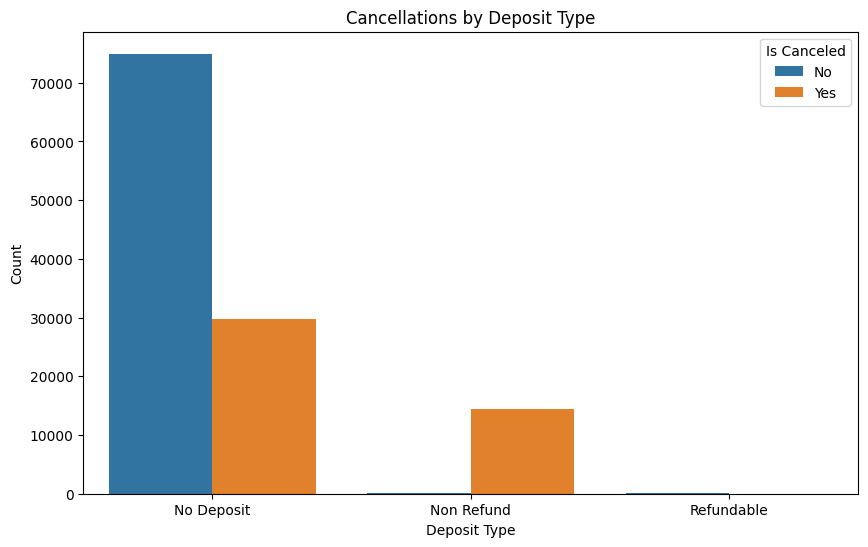

In [251]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='deposit_type', hue='is_canceled')
plt.title("Cancellations by Deposit Type")
plt.xlabel("Deposit Type")
plt.ylabel("Count")
plt.legend(title="Is Canceled", loc="upper right", labels=['No', 'Yes'])
plt.show()

###  Customer Demographics Analysis ###

# Distribution of guests from different countries #

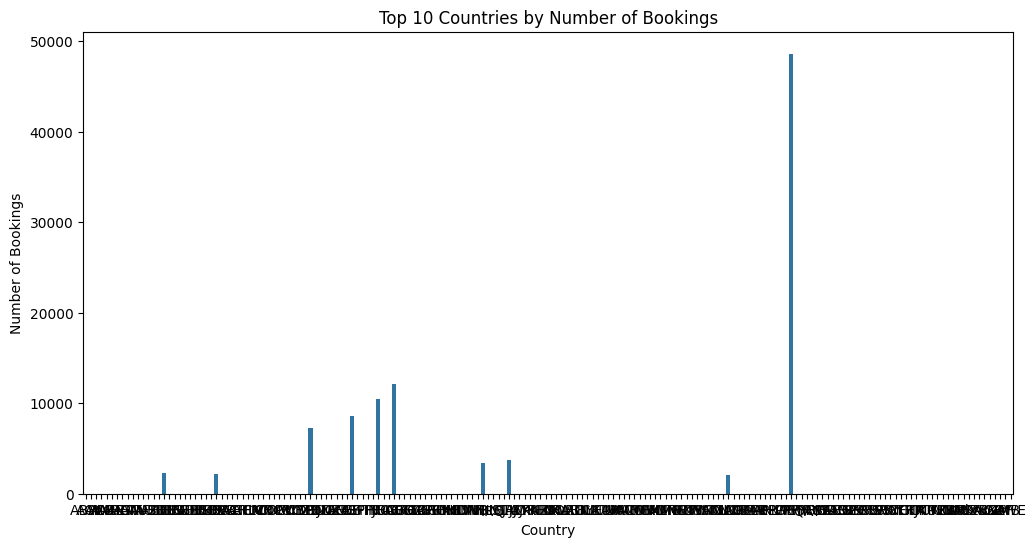

In [252]:
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries by Number of Bookings")
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.show()

# Repeated Guests by hotel type #

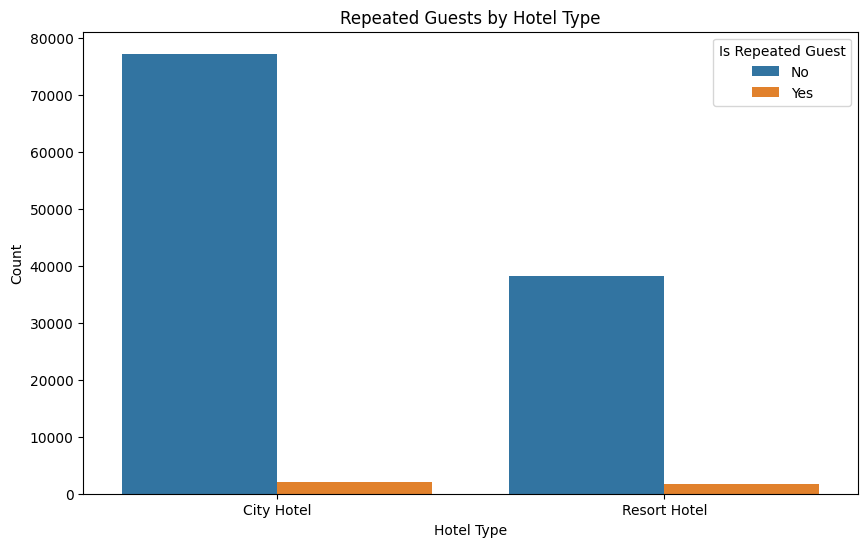

In [253]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='hotel', hue='is_repeated_guest')
plt.title("Repeated Guests by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Count")
plt.legend(title="Is Repeated Guest", labels=['No', 'Yes'])
plt.show()

### Hypothesis testing ### 

#Create a new column categorizing lead time#

In [254]:
data['long_lead_time'] = np.where(data['lead_time'] > 180, 'Long', 'Short')

 #Create a contingency table #

In [255]:
contingency_table = pd.crosstab(data['long_lead_time'], data['is_canceled'])

# Chi-Square Test #

In [256]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-Square Test for Lead Time and Cancellation")
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-Square Test for Lead Time and Cancellation
Chi-square statistic: 5321.73290110073
p-value: 0.0


# Result #

In [257]:
if p < 0.05:
    print("Result: Reject the null hypothesis - there is a significant association between lead time and cancellations.")
else:
    print("Result: Fail to reject the null hypothesis - no significant association between lead time and cancellations.")

Result: Reject the null hypothesis - there is a significant association between lead time and cancellations.


### Weekdays and Weekend Booking ###

# Create weekday and weekend ADR columns #

In [258]:
data['weekday_adr'] = np.where(data['stays_in_week_nights'] > 0, data['adr'], np.nan)
data['weekend_adr'] = np.where(data['stays_in_weekend_nights'] > 0, data['adr'], np.nan)

# Drop NA values for both groups weekend and Weekdays #

In [259]:
weekday_adr = data['weekday_adr'].dropna()
weekend_adr = data['weekend_adr'].dropna()

# Perform t-test #

In [260]:
t_stat, p_val = stats.ttest_ind(weekday_adr, weekend_adr, equal_var=False)

print("\nT-Test for ADR on Weekdays vs. Weekends")
print("T-statistic:", t_stat)
print("p-value:", p_val)


T-Test for ADR on Weekdays vs. Weekends
T-statistic: -7.805245109911797
p-value: 5.9777928249201104e-15


# Result #

In [261]:
if p_val < 0.05:
    print("Result: Reject the null hypothesis - there is a significant difference in ADR between weekdays and weekends.")
else:
    print("Result: Fail to reject the null hypothesis - no significant difference in ADR between weekdays and weekends.")

Result: Reject the null hypothesis - there is a significant difference in ADR between weekdays and weekends.


# Select relevant features excluding 'is_canceled' which is the target variable #

In [264]:
features = data[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
                 'adults', 'children', 'babies', 'previous_cancellations', 
                 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 
                 'adr', 'required_car_parking_spaces', 'total_of_special_requests']]

# Convert categorical variables to numeric using Label Encoding #

In [266]:
categorical_cols = ['meal', 'country', 'market_segment', 'distribution_channel', 
                    'reserved_room_type', 'assigned_room_type', 'deposit_type', 
                    'customer_type', 'reservation_status']

for col in categorical_cols:
    # Apply LabelEncoder and assign it back to the 'data' DataFrame
    data[col] = LabelEncoder().fit_transform(data[col])
    
    # Ensure features gets the values by specifying loc indexer
    features.loc[:, col] = data[col]


# Target variable #

In [267]:
target = data['is_canceled']

# Split data into training and test sets #

In [268]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#  Standardize the features #

In [269]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply Logistic Regression #

In [270]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Apply Random Forest #

In [271]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluation function to print performance metrics #

In [272]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"Performance Metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Evaluate Logistic Regression #

In [273]:
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

Performance Metrics for Logistic Regression:
Accuracy: 0.9898232682804256
Precision: 0.9989709581522982
Recall: 0.9739159513989522
F1 Score: 0.9862843596545691

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     14907
           1       1.00      0.97      0.99      8971

    accuracy                           0.99     23878
   macro avg       0.99      0.99      0.99     23878
weighted avg       0.99      0.99      0.99     23878



# Evaluate Random Forest Classifier 

In [279]:
evaluate_model(y_test, y_pred_log_reg, "Logistic Classifier")

Performance Metrics for Logistic Classifier:
Accuracy: 0.9898232682804256
Precision: 0.9989709581522982
Recall: 0.9739159513989522
F1 Score: 0.9862843596545691

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     14907
           1       1.00      0.97      0.99      8971

    accuracy                           0.99     23878
   macro avg       0.99      0.99      0.99     23878
weighted avg       0.99      0.99      0.99     23878



### Operational Insights ###

1.Pricing Adjustments: Introduce flexible pricing to lower cancellations. Offer early-bird discounts for bookings with shorter lead times and provide added incentives, like free amenities, for reservations close to arrival. For longer stays, consider implementing tiered cancellation fees, as these often face higher cancellation rates.

2.Customer Targeting: Address high-cancellation segments with discounts on non-refundable bookings and flexible options. Foster guest loyalty by offering perks to repeat customers, who generally exhibit lower cancellation rates.

3.Marketing and Distribution Optimization: Boost direct bookings by providing unique benefits (such as complimentary breakfast) and flexible cancellation terms. Strategically partner with OTAs and negotiate terms to reduce cancellations.

4.Enhanced Customer Flexibility: Enable easy booking adjustments and offer flexible payment options to high-risk customers, helping to prevent cancellations.

5.Operational Efficiency: Leverage cancellation predictions to better align staffing and maintain room flexibility, reducing operational disruptions.

6.Real-Time Tracking: Continuously monitor cancellations to dynamically adjust pricing and availability. Integrate a predictive model to inform overbooking strategies, maintaining high occupancy and reducing revenue loss.